# Walmart
Walmart is an American multinational retail corporation that operates a chain of
supercenters, discount departmental stores, and grocery stores in the United States.
Walmart has more than 100 million customers worldwide.

# Business Problem:

The Management team at Walmart Inc. wants to analyze the customer purchase
behavior (precisely, purchase amount) against the customer’s gender and the various
other factors to help the business make better decisions. They want to understand if the
spending habits differ between male and female customers: Do women spend more on
Black Friday than men?

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install pandas_profiling

In [ ]:
from ydata_profiling import ProfileReport

In [2]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
To: /content/walmart_data.csv?1641285094
100% 23.0M/23.0M [00:00<00:00, 56.2MB/s]


In [3]:
df=pd.read_csv('walmart_data.csv?1641285094')
print('Data Set read successfully')

Data Set read successfully


In [ ]:
df

User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                               2               0                 3      8370  
1                               2               0                 1     15200  
2                               2               0                12      1422  
3                               2               0                12      1057  
4                              4+               0                 8      7969  
...                           ...             ...               ...       ...  
550063                          1               1                20       368  
550064                          3               0                20       371  
550065                         4+               1                20       137  
550066                          2               0                20       365  
550067                         4+               1                20       490  

[550068 rows x 10 columns]

# Analysing basic metrics of the Dataset

In [ ]:
df.shape

(550068, 10)

Observed that, the dataset contains 550068 rows and 10 columns

In [ ]:
df.size

5500680

In [ ]:
df.head(5)

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                          2               0                 3      8370  
1                          2               0                 1     15200  
2                          2               0                12      1422  
3                          2               0                12      1057  
4                         4+               0                 8      7969

First 5 rows of the dataset

In [ ]:
df.tail(5)

User_ID Product_ID Gender    Age  Occupation City_Category  \
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
550063                          1               1                20       368  
550064                          3               0                20       371  
550065                         4+               1                20       137  
550066                          2               0                20       365  
550067                         4+               1                20       490

Last 5 rows of the dataset

In [ ]:
df.duplicated().sum()

0

Observed that there is no duplicte values in the dataset

In [ ]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


The above information shows that there is No Null values in the Dataset as well as datatypes of all the attributes.

In [ ]:
df.describe()

User_ID     Occupation  Marital_Status  Product_Category  \
count  5.500680e+05  550068.000000   550068.000000     550068.000000   
mean   1.003029e+06       8.076707        0.409653          5.404270   
std    1.727592e+03       6.522660        0.491770          3.936211   
min    1.000001e+06       0.000000        0.000000          1.000000   
25%    1.001516e+06       2.000000        0.000000          1.000000   
50%    1.003077e+06       7.000000        0.000000          5.000000   
75%    1.004478e+06      14.000000        1.000000          8.000000   
max    1.006040e+06      20.000000        1.000000         20.000000   

            Purchase  
count  550068.000000  
mean     9263.968713  
std      5023.065394  
min        12.000000  
25%      5823.000000  
50%      8047.000000  
75%     12054.000000  
max     23961.000000

In [ ]:
df.describe(include=object)

Product_ID  Gender     Age City_Category Stay_In_Current_City_Years
count      550068  550068  550068        550068                     550068
unique       3631       2       7             3                          5
top     P00265242       M   26-35             B                          1
freq         1880  414259  219587        231173                     193821

Observed that the statistical information of the dataset

In [ ]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<Axes: ylabel='Purchase'>

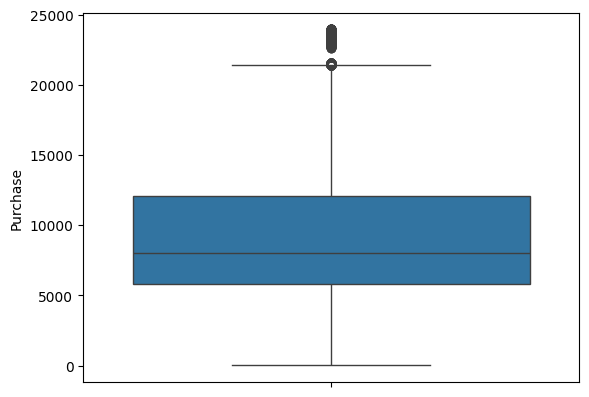

In [ ]:
sns.boxplot(df['Purchase'])

Finding outliers in the continuous attributes

In [ ]:
Q1=df['Purchase'].quantile(0.25)
Q3=df['Purchase'].quantile(0.75)

IQR=Q3-Q1

upper_bound=Q3+1.5*IQR
lower_bound=Q1-1.5*IQR

outliers= df[(df['Purchase']<lower_bound) | (df['Purchase']>upper_bound)]
outliers

outliers_count=outliers.shape[0]
outliers_count

2677

Approximately 2677 outliers are in Purchase column

In [ ]:
df['Gender'].value_counts()

Gender
M    414259
F    135809
Name: count, dtype: int64

In [ ]:
df.groupby('Gender')['Purchase'].describe()

count         mean          std   min     25%     50%      75%  \
Gender                                                                      
F       135809.0  8734.565765  4767.233289  12.0  5433.0  7914.0  11400.0   
M       414259.0  9437.526040  5092.186210  12.0  5863.0  8098.0  12454.0   

            max  
Gender           
F       23959.0  
M       23961.0



*   Average and max purchase value by Females are around 8734 and 23959 respectively.
*   Average and max purchase value by Females are around 9437 and 23961 respectively.



In [ ]:
data=df.groupby('Gender')['Purchase']

In [ ]:
df.groupby('Gender')['User_ID'].nunique()

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

<Axes: xlabel='Gender', ylabel='Purchase'>

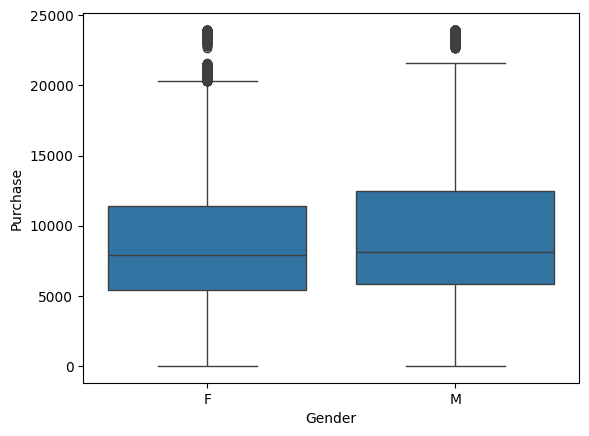

In [ ]:
sns.boxplot(x='Gender',y='Purchase',data=df)

Upon analyzing the dataset, it was observed that there is no significant difference in the median purchase value between male and female users. This suggests that gender does not have a substantial impact on the purchase amounts.

In [ ]:
def find_outliers(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = group[(group < lower_bound) | (group > upper_bound)]
    return outliers

# Apply the function to the Purchase column grouped by Gender
outliers_female = find_outliers(df[df['Gender'] == 'F']['Purchase'])
outliers_male = find_outliers(df[df['Gender'] == 'M']['Purchase'])

print("Outliers in Female Purchases:\n", len(outliers_female))
print("Outliers in Male Purchases:\n", len(outliers_male))

Outliers in Female Purchases:
 2065
Outliers in Male Purchases:
 1812


<Axes: xlabel='Marital_Status', ylabel='Purchase'>

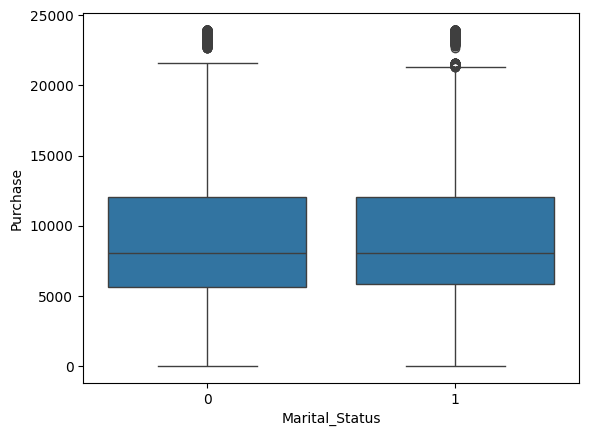

In [ ]:
sns.boxplot(x='Marital_Status',y='Purchase',data=df)

In [ ]:
def find_outliers(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = group[(group < lower_bound) | (group > upper_bound)]
    return outliers

# Apply the function to the Purchase column grouped by Gender
outliers_Unmarried = find_outliers(df[df['Marital_Status'] == 0]['Purchase'])
outliers_Married = find_outliers(df[df['Marital_Status'] == 1]['Purchase'])

print("Outliers in Unmarried Purchases:\n", len(outliers_Unmarried))
print("Outliers in Married Purchases:\n", len(outliers_Married))

Outliers in Unmarried Purchases:
 1303
Outliers in Married Purchases:
 1233


<Axes: xlabel='Age', ylabel='Purchase'>

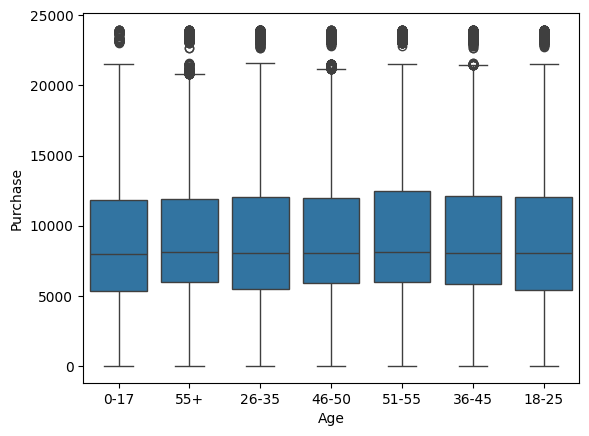

In [ ]:
sns.boxplot(x='Age',y='Purchase',data=df)

In [ ]:
def find_outliers(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = group[(group < lower_bound) | (group > upper_bound)]
    return outliers

# Apply the function to the Purchase column grouped by Gender
outliers_17 = find_outliers(df[df['Age'] == '0-17']['Purchase'])
outliers_55 = find_outliers(df[df['Age'] == '55+']['Purchase'])
outliers_35 = find_outliers(df[df['Age'] == '26-35']['Purchase'])
outliers_50 = find_outliers(df[df['Age'] == '46-50']['Purchase'])
outliers_51 = find_outliers(df[df['Age'] == '51-55']['Purchase'])
outliers_45 = find_outliers(df[df['Age'] == '36-45']['Purchase'])
outliers_25 = find_outliers(df[df['Age'] == '18-25']['Purchase'])

print("Outliers in Age Range 0-17:\n", len(outliers_17))
print("Outliers in Age 55+:\n", len(outliers_55))
print("Outliers in Age Range 26-35:\n", len(outliers_35))
print("Outliers in Age Range 46-50:\n", len(outliers_50))
print("Outliers in Age Range 51-55:\n", len(outliers_51))
print("Outliers in Age Range 36-45:\n", len(outliers_45))
print("Outliers in Age Range 18-25:\n", len(outliers_25))

Outliers in Age Range 0-17:
 56
Outliers in Age 55+:
 250
Outliers in Age Range 26-35:
 816
Outliers in Age Range 46-50:
 303
Outliers in Age Range 51-55:
 278
Outliers in Age Range 36-45:
 586
Outliers in Age Range 18-25:
 262


<Axes: xlabel='Purchase', ylabel='Count'>

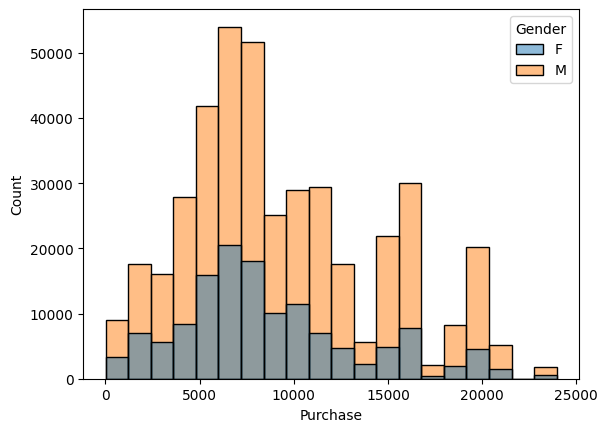

In [ ]:
sns.histplot(x='Purchase',hue='Gender',data=df,bins=20)

<Axes: xlabel='Purchase', ylabel='Density'>

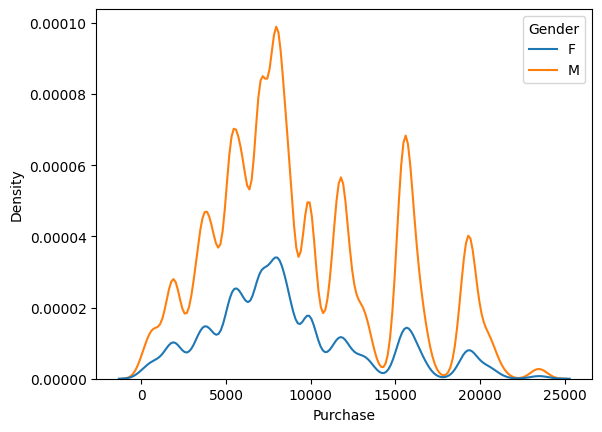

In [ ]:
sns.kdeplot(x='Purchase',hue='Gender',data=df)

* The plot indicates that the data does not precisely follow a normal distribution. This deviation is evident from the shape of the distribution, which deviates from the typical bell curve associated with a normal distribution. Such deviations could imply the presence of skewness or outliers affecting the data.
* The plot indicates that male individuals place more orders and contribute more to the total purchase amount compared to female individuals.

<Axes: xlabel='Purchase', ylabel='Density'>

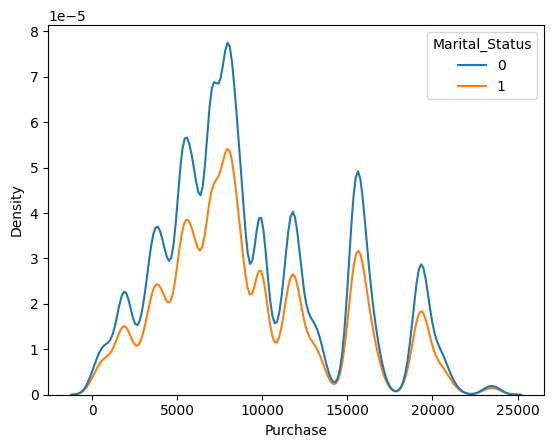

In [ ]:
sns.kdeplot(x='Purchase',hue='Marital_Status',data=df)

The plot indicates that unmarried individuals place more orders and contribute more to the total purchase amount compared to married individuals.

<Axes: xlabel='Purchase', ylabel='Density'>

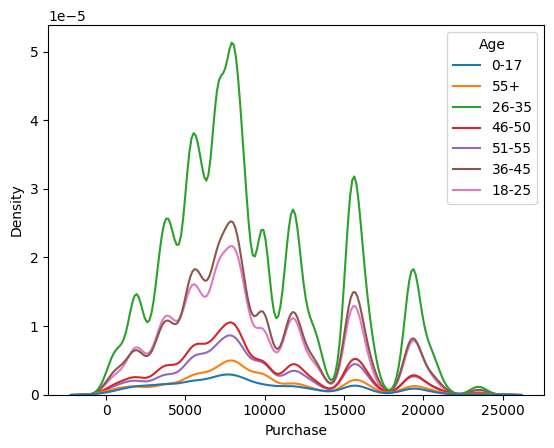

In [ ]:
sns.kdeplot(x='Purchase',hue='Age',data=df)

The plot indicates that individuals in the age range of 26 to 35 make the highest number of purchases, while those in the age range of 0 to 17 make the fewest purchases.

<Axes: xlabel='Product_Category', ylabel='Count'>

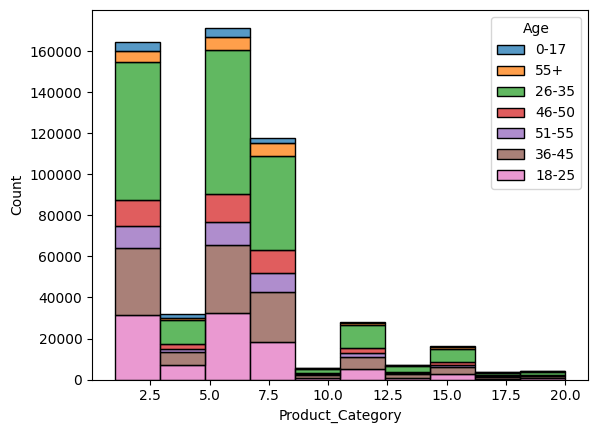

In [10]:
sns.histplot(data=df,x='Product_Category',hue='Age',bins=10,multiple='stack')

* The plot indicates that all product categories are purchased by a variety of age groups, suggesting that no single product category is exclusively favored by one age group.
* However, certain age groups do show a higher concentration of purchases in specific categories, indicating potential target markets for those products.

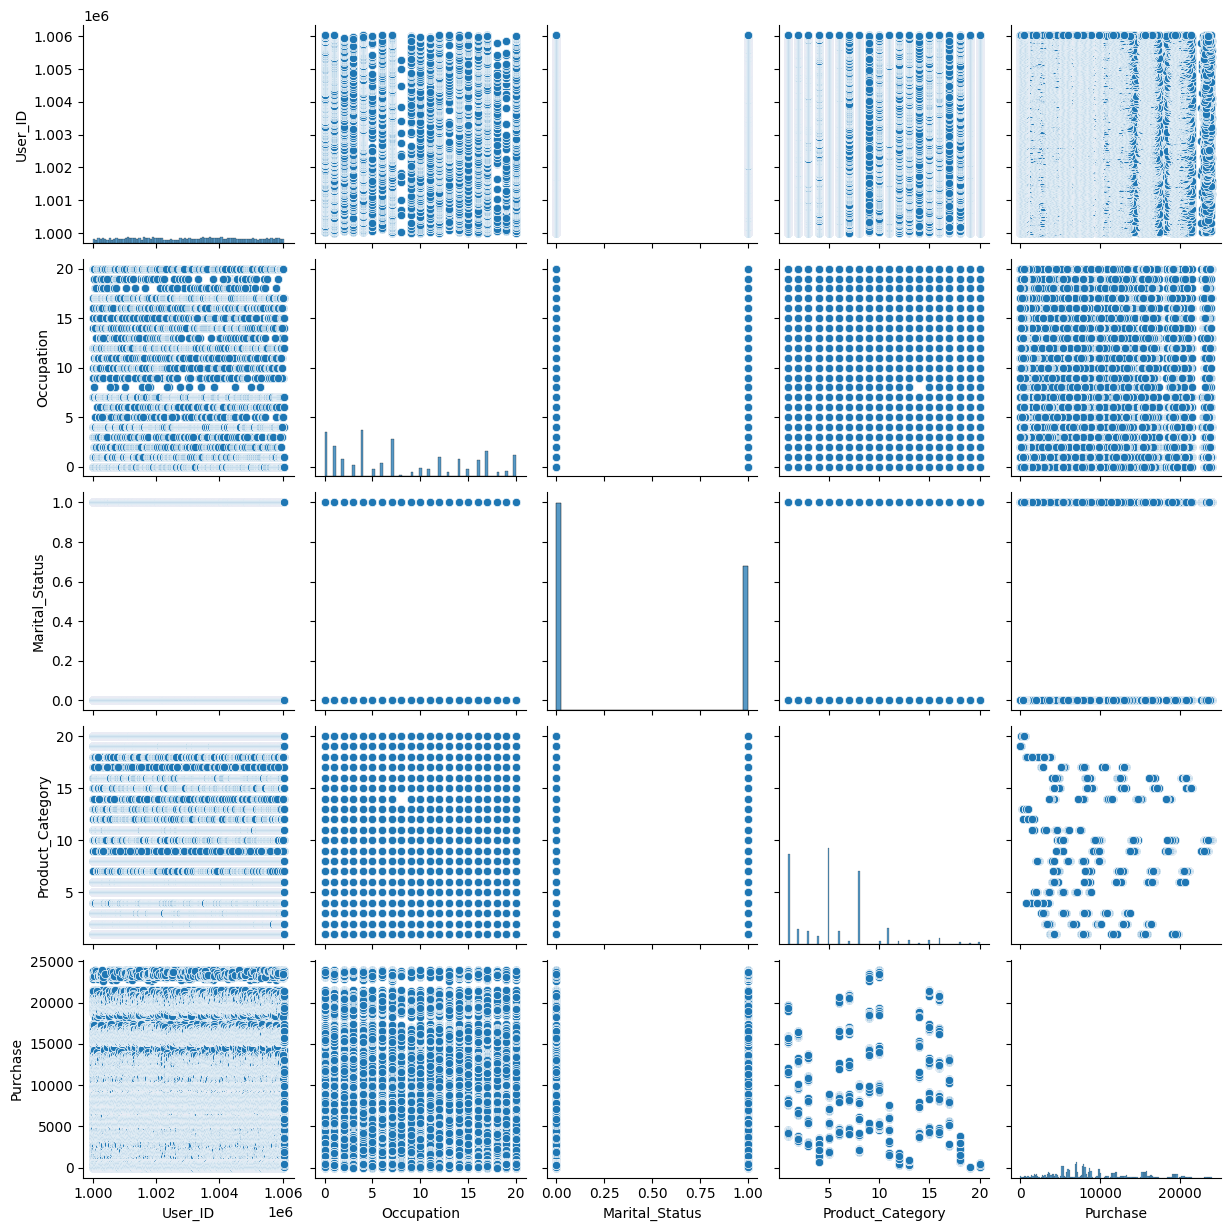

In [ ]:
sns.pairplot(df)

In [ ]:
c_df=df.select_dtypes(include=['number'])
c_df.corr()

User_ID  Occupation  Marital_Status  Product_Category  \
User_ID           1.000000   -0.023971        0.020443          0.003825   
Occupation       -0.023971    1.000000        0.024280         -0.007618   
Marital_Status    0.020443    0.024280        1.000000          0.019888   
Product_Category  0.003825   -0.007618        0.019888          1.000000   
Purchase          0.004716    0.020833       -0.000463         -0.343703   

                  Purchase  
User_ID           0.004716  
Occupation        0.020833  
Marital_Status   -0.000463  
Product_Category -0.343703  
Purchase          1.000000

<Axes: >

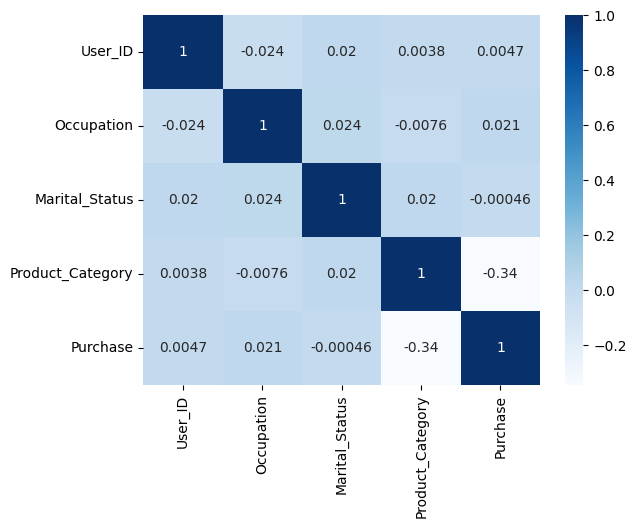

In [ ]:
sns.heatmap(c_df.corr(),cmap='Blues',annot=True)

From the heatmap, it is evident that purchase behavior is strongly associated with occupation, while marital status shows a weaker association with purchase patterns.

In [11]:
data=df.groupby('Gender')['Purchase']
data

In [13]:
data.mean()

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

In [14]:
data.std()

Gender
F    4767.233289
M    5092.186210
Name: Purchase, dtype: float64

In [16]:
# x=mean+1.96*std

upper_limit_Female= 8734.565765 + (1.96 * 4767.233289)
lower_limit_Female= 8734.565765 - (1.96 * 4767.233289)
print(f" CI for Female and Purchase of overall_dataset is ({upper_limit_Female},{lower_limit_Female})")

 CI for Female and Purchase of overall_dataset is (18078.343011439996,-609.2114814399993)


In [17]:
upper_limit_male= 9437.526040 + (1.96 * 5092.186210)
lower_limit_male= 9437.526040 - (1.96 * 5092.186210)
print(f" CI for Male and Purchase of overall_dataset is ({upper_limit_male},{lower_limit_male})")

 CI for Male and Purchase of overall_dataset is (19418.2110116,-543.158931599999)


In [19]:
df.groupby('Gender')['Purchase'].describe()

count         mean          std   min     25%     50%      75%  \
Gender                                                                      
F       135809.0  8734.565765  4767.233289  12.0  5433.0  7914.0  11400.0   
M       414259.0  9437.526040  5092.186210  12.0  5863.0  8098.0  12454.0   

            max  
Gender           
F       23959.0  
M       23961.0

In [20]:
Male_sample_means=[df[df['Gender']=='M'].sample(300,replace=True)['Purchase'].mean() for i in range(1000)]
Female_sample_means=[df[df['Gender']=='F'].sample(300,replace=True)['Purchase'].mean() for i in range(1000)]

<Axes: ylabel='Count'>

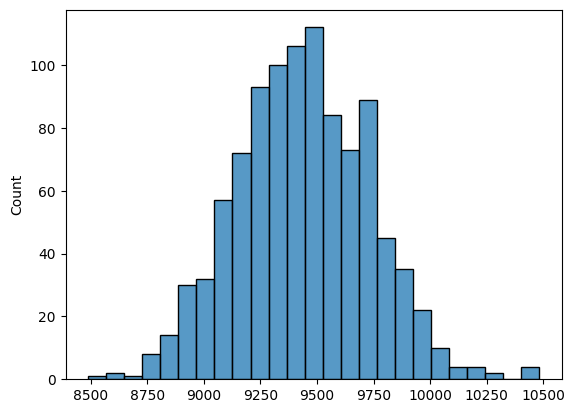

In [23]:
sns.histplot(Male_sample_means)

<Axes: ylabel='Count'>

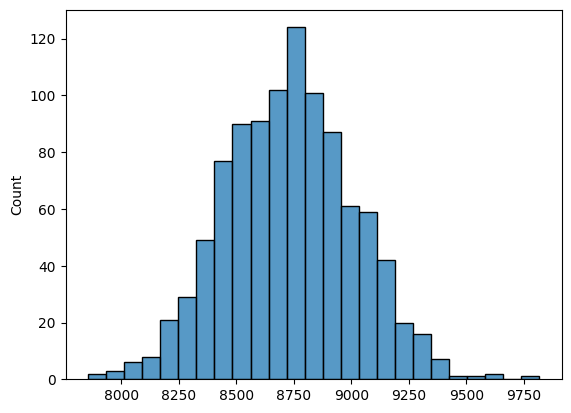

In [24]:
sns.histplot(Female_sample_means)

In [61]:
upper_limit_male_300= np.mean(Male_sample_means) + (1.96 * np.std(Male_sample_means))
lower_limit_male_300= np.mean(Male_sample_means) - (1.96 * np.std(Male_sample_means))
print(f"95% CI for average amount spent by Males for the sample size 300 is({lower_limit_male_300},{upper_limit_male_300})")

95% CI for average amount spent by Males for the sample size 300 is(8862.075420361327,10012.578279638672)


In [62]:
upper_limit_female_300= np.mean(Female_sample_means) + (1.96 * np.std(Female_sample_means))
lower_limit_female_300= np.mean(Female_sample_means) - (1.96 * np.std(Female_sample_means))
print(f"95% CI for average amount spent by Females for the sample size 300 is ({lower_limit_female_300},{upper_limit_female_300})")

95% CI for average amount spent by Females for the sample size 300 is (8181.621609038383,9279.800290961617)


In [39]:
Male_sample_means_3000=[df[df['Gender']=='M'].sample(3000,replace=True)['Purchase'].mean() for i in range(1000)]
Female_sample_means_3000=[df[df['Gender']=='F'].sample(3000,replace=True)['Purchase'].mean() for i in range(1000)]

<Axes: ylabel='Count'>

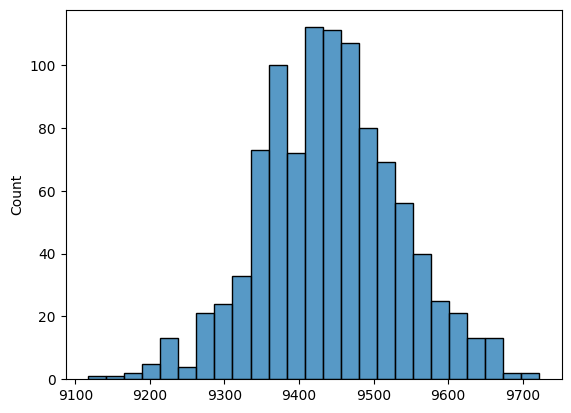

In [33]:
sns.histplot(Male_sample_means_3000)

<Axes: ylabel='Count'>

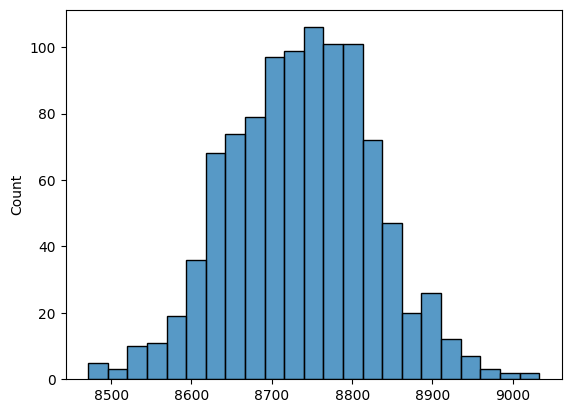

In [34]:
sns.histplot(Female_sample_means_3000)

In [57]:
upper_limit_male_3000= np.mean(Male_sample_means_3000) + (1.96 * np.std(Male_sample_means_3000))
lower_limit_male_3000= np.mean(Male_sample_means_3000) - (1.96 * np.std(Male_sample_means_3000))
print(f"95% CI for average amount spent by Males for the sample size 3000 is ({lower_limit_male_3000},{upper_limit_male_3000})")

95% CI for average amount spent by Males for the sample size 3000 is (9257.362830605458,9620.723134727878)


In [58]:
upper_limit_female_3000= np.mean(Female_sample_means_3000) + (1.96 * np.std(Female_sample_means_3000))
lower_limit_female_3000= np.mean(Female_sample_means_3000) - (1.96 * np.std(Female_sample_means_3000))
print(f"95% CI for average amount spent by Females for the sample size 3000 is ({lower_limit_female_3000},{upper_limit_female_3000})")

95% CI for average amount spent by Females for the sample size 3000 is (8564.494146771744,8907.856106561587)


In [43]:
Male_sample_means_30000=[df[df['Gender']=='M'].sample(30000,replace=True)['Purchase'].mean() for i in range(1000)]
Female_sample_means_30000=[df[df['Gender']=='F'].sample(30000,replace=True)['Purchase'].mean() for i in range(1000)]

In [59]:
upper_limit_male_30000= np.mean(Male_sample_means_30000) + (1.96 * np.std(Male_sample_means_30000))
lower_limit_male_30000= np.mean(Male_sample_means_30000) - (1.96 * np.std(Male_sample_means_30000))
print(f"95% CI for average amount spent by Males for the sample size 30000 is({lower_limit_male_30000},{upper_limit_male_30000})")

95% CI for average amount spent by Males for the sample size 30000 is(9379.358384293451,9494.001130106548)


In [60]:
upper_limit_female_30000= np.mean(Female_sample_means_30000) + (1.96 * np.std(Female_sample_means_30000))
lower_limit_female_30000= np.mean(Female_sample_means_30000) - (1.96 * np.std(Female_sample_means_30000))
print(f"95% CI for average amount spent by Females for the sample size 30000 is({lower_limit_female_30000},{upper_limit_female_30000})")

95% CI for average amount spent by Females for the sample size 30000 is(8679.266619457521,8789.195492542483)


# Average amount spent per Gender

1. Is the confidence interval computed using the entire dataset wider for one of the genders? Why is this the case?

Yes, the confidence interval is wider for the gender with higher variability in purchase amounts or a smaller number of observations. This is because greater variability or a smaller sample size increases the uncertainty of the estimate.

2. How is the width of the confidence interval affected by the sample size?

The width of the confidence interval decreases as the sample size increases. This is due to the inverse relationship between sample size and the standard error of the mean, leading to narrower confidence intervals with larger samples.

3. Do the confidence intervals for different sample sizes overlap?

The confidence intervals for different sample sizes may overlap, particularly if the sample sizes are small. Overlapping CIs suggest that the true mean is likely within the overlapping range, whereas non-overlapping CIs might indicate significant differences between means or less variability.

4. How does the sample size affect the shape of the distributions of the means?

As the sample size increases, the distribution of the sample means becomes more normally distributed due to the central limit theorem. Larger samples lead to a more tightly clustered distribution around the true mean, resulting in less variability and a more pronounced bell-shaped curve.

In [47]:
Unmarried_sample_means_300=[df[df['Marital_Status']==0].sample(300,replace=True)['Purchase'].mean() for i in range(1000)]
Married_sample_means_300=[df[df['Marital_Status']==1].sample(300,replace=True)['Purchase'].mean() for i in range(1000)]

In [54]:
upper_limit_Unmarried_300= np.mean(Unmarried_sample_means_300) + (1.96 * np.std(Unmarried_sample_means_300))
lower_limit_Unmarried_300= np.mean(Unmarried_sample_means_300) - (1.96 * np.std(Unmarried_sample_means_300))
print(f" 95% CI for average amount spent by Unmarried individuals for the sample size 300 is({lower_limit_Unmarried_300},{upper_limit_Unmarried_300})")

upper_limit_Married_300= np.mean(Married_sample_means_300) + (1.96 * np.std(Married_sample_means_300))
lower_limit_Married_300= np.mean(Married_sample_means_300) - (1.96 * np.std(Married_sample_means_300))
print(f" 95% CI for average amount spent by Married individuals for the sample size 300 is ({lower_limit_Married_300},{upper_limit_Married_300})")

 95% CI for average amount spent by Unmarried individuals for the sample size 300 is(8693.104623763686,9829.86396956965)
 95% CI for average amount spent by Married individuals for the sample size 300 is (8682.445521592834,9831.830665073832)


In [55]:
Unmarried_sample_means_3000=[df[df['Marital_Status']==0].sample(3000,replace=True)['Purchase'].mean() for i in range(1000)]
Married_sample_means_3000=[df[df['Marital_Status']==1].sample(3000,replace=True)['Purchase'].mean() for i in range(1000)]

upper_limit_Unmarried_3000= np.mean(Unmarried_sample_means_3000) + (1.96 * np.std(Unmarried_sample_means_3000))
lower_limit_Unmarried_3000= np.mean(Unmarried_sample_means_3000) - (1.96 * np.std(Unmarried_sample_means_3000))
print(f" 95% CI for average amount spent by Unmarried individuals for the sample size 3000 is ({lower_limit_Unmarried_3000},{upper_limit_Unmarried_3000})")

upper_limit_Married_3000= np.mean(Married_sample_means_3000) + (1.96 * np.std(Married_sample_means_3000))
lower_limit_Married_3000= np.mean(Married_sample_means_3000) - (1.96 * np.std(Married_sample_means_3000))
print(f" 95% CI for average amount spent by Married individuals for the sample size 3000 is ({lower_limit_Married_3000},{upper_limit_Married_3000})")

 95% CI for average amount spent by Unmarried individuals for the sample size 3000 is (9085.465021177419,9446.47269882258)
 95% CI for average amount spent by Married individuals for the sample size 3000 is (9082.504864460469,9444.413047539532)


In [56]:
Unmarried_sample_means_30000=[df[df['Marital_Status']==0].sample(30000,replace=True)['Purchase'].mean() for i in range(1000)]
Married_sample_means_30000=[df[df['Marital_Status']==1].sample(30000,replace=True)['Purchase'].mean() for i in range(1000)]

upper_limit_Unmarried_30000= np.mean(Unmarried_sample_means_30000) + (1.96 * np.std(Unmarried_sample_means_30000))
lower_limit_Unmarried_30000= np.mean(Unmarried_sample_means_30000) - (1.96 * np.std(Unmarried_sample_means_30000))
print(f"95% CI for average amount spent by Unmarried individuals for the sample size 30000 is({lower_limit_Unmarried_30000},{upper_limit_Unmarried_30000})")

upper_limit_Married_30000= np.mean(Married_sample_means_30000) + (1.96 * np.std(Married_sample_means_30000))
lower_limit_Married_30000= np.mean(Married_sample_means_30000) - (1.96 * np.std(Married_sample_means_30000))
print(f"95% CI for average amount spent by Married individuals for the sample size 30000 is({lower_limit_Married_30000},{upper_limit_Married_30000})")

95% CI for average amount spent by Unmarried individuals for the sample size 30000 is(9208.674227139842,9322.034102526826)
95% CI for average amount spent by Married individuals for the sample size 30000 is(9206.653314421488,9318.947574111844)


In [66]:
Age_0_17_sample_means_300=[df[df['Age']=='0-17'].sample(300,replace=True)['Purchase'].mean() for i in range(1000)]
Age_18_25_sample_means_300=[df[df['Age']=='18-25'].sample(300,replace=True)['Purchase'].mean() for i in range(1000)]
Age_26_35_sample_means_300=[df[df['Age']=='26-35'].sample(300,replace=True)['Purchase'].mean() for i in range(1000)]
Age_36_45_sample_means_300=[df[df['Age']=='36-45'].sample(300,replace=True)['Purchase'].mean() for i in range(1000)]
Age_46_50_sample_means_300=[df[df['Age']=='46-50'].sample(300,replace=True)['Purchase'].mean() for i in range(1000)]
Age_51_55_sample_means_300=[df[df['Age']=='51-55'].sample(300,replace=True)['Purchase'].mean() for i in range(1000)]
Age_55_sample_means_300=[df[df['Age']=='55+'].sample(300,replace=True)['Purchase'].mean() for i in range(1000)]

upper_limit_Age_0_17_300= np.mean(Age_0_17_sample_means_300) + (1.96 * np.std(Age_0_17_sample_means_300))
lower_limit_Age_0_17_300= np.mean(Age_0_17_sample_means_300) - (1.96 * np.std(Age_0_17_sample_means_300))
print(f" 95% CI for average amount spent by Age range 0-17 individuals for the sample size 300 is({lower_limit_Age_0_17_300},{upper_limit_Age_0_17_300})")

upper_limit_Age_18_25_300= np.mean(Age_18_25_sample_means_300) + (1.96 * np.std(Age_18_25_sample_means_300))
lower_limit_Age_18_25_300= np.mean(Age_18_25_sample_means_300) - (1.96 * np.std(Age_18_25_sample_means_300))
print(f" 95% CI for average amount spent by Age range 18-25 individuals for the sample size 300 is({lower_limit_Age_18_25_300},{upper_limit_Age_18_25_300})")

upper_limit_Age_26_35_300= np.mean(Age_26_35_sample_means_300) + (1.96 * np.std(Age_26_35_sample_means_300))
lower_limit_Age_26_35_300= np.mean(Age_26_35_sample_means_300) - (1.96 * np.std(Age_26_35_sample_means_300))
print(f" 95% CI for average amount spent by Age range 26-35 individuals for the sample size 300 is({lower_limit_Age_26_35_300},{upper_limit_Age_26_35_300})")

upper_limit_Age_36_45_300= np.mean(Age_36_45_sample_means_300) + (1.96 * np.std(Age_36_45_sample_means_300))
lower_limit_Age_36_45_300= np.mean(Age_36_45_sample_means_300) - (1.96 * np.std(Age_36_45_sample_means_300))
print(f" 95% CI for average amount spent by Age range 36-45 individuals for the sample size 300 is({lower_limit_Age_36_45_300},{upper_limit_Age_36_45_300})")

upper_limit_Age_46_50_300= np.mean(Age_46_50_sample_means_300) + (1.96 * np.std(Age_46_50_sample_means_300))
lower_limit_Age_46_50_300= np.mean(Age_46_50_sample_means_300) - (1.96 * np.std(Age_46_50_sample_means_300))
print(f" 95% CI for average amount spent by Age range 46-50 individuals for the sample size 300 is({lower_limit_Age_46_50_300},{upper_limit_Age_46_50_300})")

upper_limit_Age_51_55_300= np.mean(Age_51_55_sample_means_300) + (1.96 * np.std(Age_51_55_sample_means_300))
lower_limit_Age_51_55_300= np.mean(Age_51_55_sample_means_300) - (1.96 * np.std(Age_51_55_sample_means_300))
print(f" 95% CI for average amount spent by Age range 51-55 individuals for the sample size 300 is({lower_limit_Age_51_55_300},{upper_limit_Age_51_55_300})")

upper_limit_Age_55_300= np.mean(Age_55_sample_means_300) + (1.96 * np.std(Age_55_sample_means_300))
lower_limit_Age_55_300= np.mean(Age_55_sample_means_300) - (1.96 * np.std(Age_55_sample_means_300))
print(f" 95% CI for average amount spent by Age range 55+ individuals for the sample size 300 is({lower_limit_Age_55_300},{upper_limit_Age_55_300})")

 95% CI for average amount spent by Age range 0-17 individuals for the sample size 300 is(8351.347308757526,9498.360311242472)
 95% CI for average amount spent by Age range 18-25 individuals for the sample size 300 is(8628.852141474941,9733.704245191726)
 95% CI for average amount spent by Age range 26-35 individuals for the sample size 300 is(8690.63949728236,9812.167469384307)
 95% CI for average amount spent by Age range 36-45 individuals for the sample size 300 is(8759.934723632592,9895.215316367412)
 95% CI for average amount spent by Age range 46-50 individuals for the sample size 300 is(8622.643332467183,9780.505694199483)
 95% CI for average amount spent by Age range 51-55 individuals for the sample size 300 is(8992.631662922367,10065.657370410963)
 95% CI for average amount spent by Age range 55+ individuals for the sample size 300 is(8766.920930676139,9897.470469323858)


In [67]:
Age_0_17_sample_means_3000=[df[df['Age']=='0-17'].sample(3000,replace=True)['Purchase'].mean() for i in range(1000)]
Age_18_25_sample_means_3000=[df[df['Age']=='18-25'].sample(3000,replace=True)['Purchase'].mean() for i in range(1000)]
Age_26_35_sample_means_3000=[df[df['Age']=='26-35'].sample(3000,replace=True)['Purchase'].mean() for i in range(1000)]
Age_36_45_sample_means_3000=[df[df['Age']=='36-45'].sample(3000,replace=True)['Purchase'].mean() for i in range(1000)]
Age_46_50_sample_means_3000=[df[df['Age']=='46-50'].sample(3000,replace=True)['Purchase'].mean() for i in range(1000)]
Age_51_55_sample_means_3000=[df[df['Age']=='51-55'].sample(3000,replace=True)['Purchase'].mean() for i in range(1000)]
Age_55_sample_means_3000=[df[df['Age']=='55+'].sample(3000,replace=True)['Purchase'].mean() for i in range(1000)]

upper_limit_Age_0_17_3000= np.mean(Age_0_17_sample_means_3000) + (1.96 * np.std(Age_0_17_sample_means_3000))
lower_limit_Age_0_17_3000= np.mean(Age_0_17_sample_means_3000) - (1.96 * np.std(Age_0_17_sample_means_3000))
print(f" 95% CI for average amount spent by Age range 0-17 individuals for the sample size 3000 is({lower_limit_Age_0_17_3000},{upper_limit_Age_0_17_3000})")

upper_limit_Age_18_25_3000= np.mean(Age_18_25_sample_means_3000) + (1.96 * np.std(Age_18_25_sample_means_3000))
lower_limit_Age_18_25_3000= np.mean(Age_18_25_sample_means_3000) - (1.96 * np.std(Age_18_25_sample_means_3000))
print(f" 95% CI for average amount spent by Age range 18-25 individuals for the sample size 3000 is({lower_limit_Age_18_25_3000},{upper_limit_Age_18_25_3000})")

upper_limit_Age_26_35_3000= np.mean(Age_26_35_sample_means_3000) + (1.96 * np.std(Age_26_35_sample_means_3000))
lower_limit_Age_26_35_3000= np.mean(Age_26_35_sample_means_3000) - (1.96 * np.std(Age_26_35_sample_means_3000))
print(f" 95% CI for average amount spent by Age range 26-35 individuals for the sample size 3000 is({lower_limit_Age_26_35_3000},{upper_limit_Age_26_35_3000})")

upper_limit_Age_36_45_3000= np.mean(Age_36_45_sample_means_3000) + (1.96 * np.std(Age_36_45_sample_means_3000))
lower_limit_Age_36_45_3000= np.mean(Age_36_45_sample_means_3000) - (1.96 * np.std(Age_36_45_sample_means_3000))
print(f" 95% CI for average amount spent by Age range 36-45 individuals for the sample size 3000 is({lower_limit_Age_36_45_3000},{upper_limit_Age_36_45_3000})")

upper_limit_Age_46_50_3000= np.mean(Age_46_50_sample_means_3000) + (1.96 * np.std(Age_46_50_sample_means_3000))
lower_limit_Age_46_50_3000= np.mean(Age_46_50_sample_means_3000) - (1.96 * np.std(Age_46_50_sample_means_3000))
print(f" 95% CI for average amount spent by Age range 46-50 individuals for the sample size 3000 is({lower_limit_Age_46_50_3000},{upper_limit_Age_46_50_3000})")

upper_limit_Age_51_55_3000= np.mean(Age_51_55_sample_means_3000) + (1.96 * np.std(Age_51_55_sample_means_3000))
lower_limit_Age_51_55_3000= np.mean(Age_51_55_sample_means_3000) - (1.96 * np.std(Age_51_55_sample_means_3000))
print(f" 95% CI for average amount spent by Age range 51-55 individuals for the sample size 3000 is({lower_limit_Age_51_55_3000},{upper_limit_Age_51_55_3000})")

upper_limit_Age_55_3000= np.mean(Age_55_sample_means_3000) + (1.96 * np.std(Age_55_sample_means_3000))
lower_limit_Age_55_3000= np.mean(Age_55_sample_means_3000) - (1.96 * np.std(Age_55_sample_means_3000))
print(f" 95% CI for average amount spent by Age range 55+ individuals for the sample size 3000 is({lower_limit_Age_55_3000},{upper_limit_Age_55_3000})")

 95% CI for average amount spent by Age range 0-17 individuals for the sample size 3000 is(8755.542134853187,9107.636308480147)
 95% CI for average amount spent by Age range 18-25 individuals for the sample size 3000 is(8991.785807226599,9347.665881440065)
 95% CI for average amount spent by Age range 26-35 individuals for the sample size 3000 is(9072.627659825921,9424.922736840748)
 95% CI for average amount spent by Age range 36-45 individuals for the sample size 3000 is(9161.052574535259,9504.950528798077)
 95% CI for average amount spent by Age range 46-50 individuals for the sample size 3000 is(9024.594626390215,9387.131332943114)
 95% CI for average amount spent by Age range 51-55 individuals for the sample size 3000 is(9359.79160310933,9710.933104890672)
 95% CI for average amount spent by Age range 55+ individuals for the sample size 3000 is(9158.849249721312,9509.968799612023)


In [68]:
Age_0_17_sample_means_30000=[df[df['Age']=='0-17'].sample(30000,replace=True)['Purchase'].mean() for i in range(1000)]
Age_18_25_sample_means_30000=[df[df['Age']=='18-25'].sample(30000,replace=True)['Purchase'].mean() for i in range(1000)]
Age_26_35_sample_means_30000=[df[df['Age']=='26-35'].sample(30000,replace=True)['Purchase'].mean() for i in range(1000)]
Age_36_45_sample_means_30000=[df[df['Age']=='36-45'].sample(30000,replace=True)['Purchase'].mean() for i in range(1000)]
Age_46_50_sample_means_30000=[df[df['Age']=='46-50'].sample(30000,replace=True)['Purchase'].mean() for i in range(1000)]
Age_51_55_sample_means_30000=[df[df['Age']=='51-55'].sample(30000,replace=True)['Purchase'].mean() for i in range(1000)]
Age_55_sample_means_30000=[df[df['Age']=='55+'].sample(30000,replace=True)['Purchase'].mean() for i in range(1000)]

upper_limit_Age_0_17_30000= np.mean(Age_0_17_sample_means_30000) + (1.96 * np.std(Age_0_17_sample_means_30000))
lower_limit_Age_0_17_30000= np.mean(Age_0_17_sample_means_30000) - (1.96 * np.std(Age_0_17_sample_means_30000))
print(f" 95% CI for average amount spent by Age range 0-17 individuals for the sample size 30000 is({lower_limit_Age_0_17_30000},{upper_limit_Age_0_17_30000})")

upper_limit_Age_18_25_30000= np.mean(Age_18_25_sample_means_30000) + (1.96 * np.std(Age_18_25_sample_means_30000))
lower_limit_Age_18_25_30000= np.mean(Age_18_25_sample_means_30000) - (1.96 * np.std(Age_18_25_sample_means_30000))
print(f" 95% CI for average amount spent by Age range 18-25 individuals for the sample size 30000 is({lower_limit_Age_18_25_30000},{upper_limit_Age_18_25_30000})")

upper_limit_Age_26_35_30000= np.mean(Age_26_35_sample_means_30000) + (1.96 * np.std(Age_26_35_sample_means_30000))
lower_limit_Age_26_35_30000= np.mean(Age_26_35_sample_means_30000) - (1.96 * np.std(Age_26_35_sample_means_30000))
print(f" 95% CI for average amount spent by Age range 26-35 individuals for the sample size 30000 is({lower_limit_Age_26_35_30000},{upper_limit_Age_26_35_30000})")

upper_limit_Age_36_45_30000= np.mean(Age_36_45_sample_means_30000) + (1.96 * np.std(Age_36_45_sample_means_30000))
lower_limit_Age_36_45_30000= np.mean(Age_36_45_sample_means_30000) - (1.96 * np.std(Age_36_45_sample_means_30000))
print(f" 95% CI for average amount spent by Age range 36-45 individuals for the sample size 30000 is({lower_limit_Age_36_45_30000},{upper_limit_Age_36_45_30000})")

upper_limit_Age_46_50_30000= np.mean(Age_46_50_sample_means_30000) + (1.96 * np.std(Age_46_50_sample_means_30000))
lower_limit_Age_46_50_30000= np.mean(Age_46_50_sample_means_30000) - (1.96 * np.std(Age_46_50_sample_means_30000))
print(f" 95% CI for average amount spent by Age range 46-50 individuals for the sample size 30000 is({lower_limit_Age_46_50_30000},{upper_limit_Age_46_50_30000})")

upper_limit_Age_51_55_30000= np.mean(Age_51_55_sample_means_30000) + (1.96 * np.std(Age_51_55_sample_means_30000))
lower_limit_Age_51_55_30000= np.mean(Age_51_55_sample_means_30000) - (1.96 * np.std(Age_51_55_sample_means_30000))
print(f" 95% CI for average amount spent by Age range 51-55 individuals for the sample size 30000 is({lower_limit_Age_51_55_30000},{upper_limit_Age_51_55_30000})")

upper_limit_Age_55_30000= np.mean(Age_55_sample_means_30000) + (1.96 * np.std(Age_55_sample_means_30000))
lower_limit_Age_55_30000= np.mean(Age_55_sample_means_30000) - (1.96 * np.std(Age_55_sample_means_30000))
print(f" 95% CI for average amount spent by Age range 55+ individuals for the sample size 30000 is({lower_limit_Age_55_30000},{upper_limit_Age_55_30000})")

 95% CI for average amount spent by Age range 0-17 individuals for the sample size 30000 is(8874.701866706613,8989.436397226718)
 95% CI for average amount spent by Age range 18-25 individuals for the sample size 30000 is(9111.649783928187,9227.682055138477)
 95% CI for average amount spent by Age range 26-35 individuals for the sample size 30000 is(9196.016511045558,9309.836390954444)
 95% CI for average amount spent by Age range 36-45 individuals for the sample size 30000 is(9276.115060592934,9388.961188873729)
 95% CI for average amount spent by Age range 46-50 individuals for the sample size 30000 is(9154.624987945886,9262.03303238745)
 95% CI for average amount spent by Age range 51-55 individuals for the sample size 30000 is(9477.059051231334,9589.087755301998)
 95% CI for average amount spent by Age range 55+ individuals for the sample size 30000 is(9277.139870712675,9392.95652242066)


# Average amount spent per Age and Marital_status

1. Is the confidence interval computed using the entire dataset wider for one of the genders? Why is this the case?

We are computing confidence intervals for the average amount spent per age and Marital_status, not gender. So, this question is not applicable here.

2. How is the width of the confidence interval affected by the sample size?

As the sample size increases, the width of the confidence interval decreases. With a larger sample size, there is less uncertainty about the true population mean, resulting in a narrower confidence interval.

3. Do the confidence intervals for different sample sizes overlap?

You'll need to compare the confidence intervals for different sample sizes to determine if they overlap. Overlapping confidence intervals suggest that there may not be a significant difference in the means of the two groups.

4. How does the sample size affect the shape of the distributions of the means?

As the sample size increases, the distribution of sample means becomes more normally distributed, as predicted by the central limit theorem. With a larger sample size, the variability of the sample means decreases, resulting in a more symmetric and bell-shaped distribution.

# Recommendations

Gender-Based: Tailor marketing, product assortment, and discounts to gender preferences. Enhance customer experience with personalized recommendations.

Marital Status-Based: Offer targeted promotions, product bundles, and loyalty programs based on marital status to drive customer loyalty.

Age-Based: Personalize product recommendations, optimize in-store layout, and engage customers digitally to cater to different age groups' preferences.

By implementing these targeted strategies, Walmart can improve customer satisfaction and drive sales growth.